In [41]:
import numpy as np
import random
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [47]:
import numpy as np
import matplotlib.pyplot as plt

class GeneticAlgorithm:
    def __init__(self, population_size, mutation_rate, crossover_rate, num_generations, budgets, utilities, costs, elitism_rate=0.2):
        self.population_size = population_size
        self.mutation_rate = mutation_rate
        self.crossover_rate = crossover_rate
        self.num_generations = num_generations
        self.budgets = budgets
        self.utilities = utilities
        self.costs = costs
        self.num_items = len(utilities)
        self.population = self.initialize_population()
        self.elitism_rate = elitism_rate
        self.best_fitness_history = []

    def initialize_population(self):
        return np.random.randint(2, size=(self.population_size, self.num_items))

    def fitness(self, individual):
        total_costs = np.sum(individual[:, np.newaxis] * self.costs, axis=0)
        if np.any(total_costs > self.budgets):
            return 0
        return np.sum(individual * self.utilities)

    def selection(self):
        fitnesses = np.array([self.fitness(individual) for individual in self.population])
        total_fitness = fitnesses.sum()
        if total_fitness == 0:
            probabilities = np.ones(self.population_size) / self.population_size
        else:
            probabilities = fitnesses / total_fitness
        selected_indices = np.random.choice(np.arange(self.population_size), size=self.population_size, p=probabilities)
        return self.population[selected_indices]

    def crossover(self, parent1, parent2):
        if np.random.rand() < self.crossover_rate:
            point = np.random.randint(1, self.num_items - 1)
            return np.concatenate((parent1[:point], parent2[point:]))
        return np.random.choice([parent1, parent2])

    def mutate(self, individual):
        for i in range(self.num_items):
            if np.random.rand() < self.mutation_rate:
                individual[i] = 1 - individual[i]
        return individual

    def repair(self, individual):
        for i in range(len(self.budgets)):
            while np.sum(individual * self.costs[:, i]) > self.budgets[i]:
                included_items = individual == 1
                utility_to_cost_ratio = self.utilities[included_items] / self.costs[included_items, i]
                worst_item_index = np.argmin(utility_to_cost_ratio)
                actual_worst_item_index = np.where(included_items)[0][worst_item_index]
                individual[actual_worst_item_index] = 0
        return individual

    def run(self):
        num_elites = int(self.population_size * self.elitism_rate)
        
        for generation in range(self.num_generations):
            fitnesses = np.array([self.fitness(individual) for individual in self.population])
            elite_indices = np.argsort(fitnesses)[-num_elites:]
            elites = self.population[elite_indices]
            selected_population = self.selection()
            next_population = []

            for i in range(0, self.population_size - num_elites, 2):
                parent1, parent2 = selected_population[i], selected_population[i + 1]
                offspring1, offspring2 = self.crossover(parent1, parent2), self.crossover(parent2, parent1)
                offspring1, offspring2 = self.mutate(offspring1), self.mutate(offspring2)
                offspring1, offspring2 = self.repair(offspring1), self.repair(offspring2)
                next_population.extend([offspring1, offspring2])

            next_population.extend(elites)
            self.population = np.array(next_population)
            
            best_fitness = max(fitnesses)
            self.best_fitness_history.append(best_fitness)
            print(f'Generation {generation}: Best Fitness = {best_fitness}')

        best_solution = self.population[np.argmax([self.fitness(individual) for individual in self.population])]
        
        return best_solution

# Define parameters
np.random.seed(0)
population_size = 100
mutation_rate = 0.1
crossover_rate = 0.8
num_generations = 100
budgets = [200, 300, 250, 350, 400]
utilities = np.random.randint(10, 100, size=50)
costs = np.random.randint(1, 50, size=(50, 5))
elitism_rate = 0.2

# Initialize and run the genetic algorithm
ga = GeneticAlgorithm(population_size, mutation_rate, crossover_rate, num_generations, budgets, utilities, costs, elitism_rate)
best_solution = ga.run()

# Plot the evolution of the best fitness over generations
plt.plot(ga.best_fitness_history)
plt.xlabel('Generation')
plt.ylabel('Best Fitness')
plt.title('Evolution of the Best Fitness Over Generations')
plt.show()


ValueError: a must be 1-dimensional

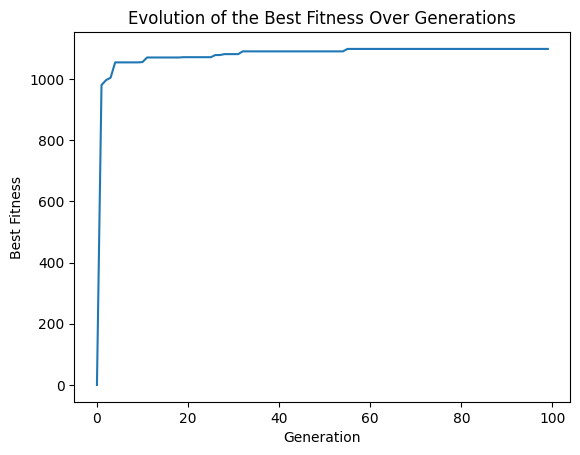

In [49]:
import numpy as np
import matplotlib.pyplot as plt

class GeneticAlgorithm:
    def __init__(self, population_size, mutation_rate, crossover_rate, num_generations, budgets, utilities, costs, elitism_rate=0.2):
        self.population_size = population_size
        self.mutation_rate = mutation_rate
        self.crossover_rate = crossover_rate
        self.num_generations = num_generations
        self.budgets = budgets
        self.utilities = utilities
        self.costs = costs
        self.num_items = len(utilities)
        self.population = self.initialize_population()
        self.elitism_rate = elitism_rate
        self.best_fitness_history = []

    def initialize_population(self):
        return np.random.randint(2, size=(self.population_size, self.num_items))

    def fitness(self, individual):
        total_costs = np.sum(individual[:, np.newaxis] * self.costs, axis=0)
        if np.any(total_costs > self.budgets):
            return 0
        return np.sum(individual * self.utilities)

    def selection(self):
        fitnesses = np.array([self.fitness(individual) for individual in self.population])
        total_fitness = fitnesses.sum()
        if total_fitness == 0:
            probabilities = np.ones(self.population_size) / self.population_size
        else:
            probabilities = fitnesses / total_fitness
        selected_indices = np.random.choice(np.arange(self.population_size), size=self.population_size, p=probabilities)
        return self.population[selected_indices]

    def crossover(self, parent1, parent2):
        if np.random.rand() < self.crossover_rate:
            point = np.random.randint(1, self.num_items - 1)
            return np.concatenate((parent1[:point], parent2[point:]))
        return parent1 if np.random.rand() < 0.5 else parent2

    def mutate(self, individual):
        for i in range(self.num_items):
            if np.random.rand() < self.mutation_rate:
                individual[i] = 1 - individual[i]
        return individual

    def repair(self, individual):
        for i in range(len(self.budgets)):
            while np.sum(individual * self.costs[:, i]) > self.budgets[i]:
                included_items = individual == 1
                utility_to_cost_ratio = self.utilities[included_items] / self.costs[included_items, i]
                worst_item_index = np.argmin(utility_to_cost_ratio)
                actual_worst_item_index = np.where(included_items)[0][worst_item_index]
                individual[actual_worst_item_index] = 0
        return individual

    def run(self):
        num_elites = int(self.population_size * self.elitism_rate)
        
        for generation in range(self.num_generations):
            fitnesses = np.array([self.fitness(individual) for individual in self.population])
            elite_indices = np.argsort(fitnesses)[-num_elites:]
            elites = self.population[elite_indices]
            selected_population = self.selection()
            next_population = []

            for i in range(0, self.population_size - num_elites, 2):
                parent1, parent2 = selected_population[i], selected_population[i + 1]
                offspring1, offspring2 = self.crossover(parent1, parent2), self.crossover(parent2, parent1)
                offspring1, offspring2 = self.mutate(offspring1), self.mutate(offspring2)
                offspring1, offspring2 = self.repair(offspring1), self.repair(offspring2)
                next_population.extend([offspring1, offspring2])

            next_population.extend(elites)
            self.population = np.array(next_population)
            
            best_fitness = max(fitnesses)
            self.best_fitness_history.append(best_fitness)
            # print(f'Generation {generation}: Best Fitness = {best_fitness}')

        best_solution = self.population[np.argmax([self.fitness(individual) for individual in self.population])]
        
        return best_solution

In [ ]:
# Parameters
np.random.seed(0)
population_size = 100
mutation_rate = 0.1
crossover_rate = 0.8
num_generations = 100
budgets = [200, 300, 250, 350, 400]
utilities = np.random.randint(10, 100, size=50)
costs = np.random.randint(1, 50, size=(50, 5))
elitism_rate = 0.2

# Initialize and run the genetic algorithm
ga = GeneticAlgorithm(population_size, mutation_rate, crossover_rate, num_generations, budgets, utilities, costs, elitism_rate)
best_solution = ga.run()

# Plot the evolution of the best fitness over generations
plt.plot(ga.best_fitness_history)
plt.xlabel('Generation')
plt.ylabel('Best Fitness')
plt.title('Evolution of the Best Fitness Over Generations')
plt.show()


# Sandbox

In [ ]:
import random
random.choice([[1, 2, 3],[4, 5, 6]])

for i in range(len(costs)):
    utilities /costs[i]

ValueError: operands could not be broadcast together with shapes (3,) (2,) 